# Data Cleaning and Processing

In [62]:
# Student Name: Shen Zhang
# Student Number: 1009901368
# Assignment 3 - ANCOVA

In [63]:
from google.colab import files
uploaded = files.upload()

Saving INF2178_A3_data.csv to INF2178_A3_data (2).csv


In [64]:
# Import the packages for analysis

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the csv dataset file here
mydata = pd.read_csv('INF2178_A3_data.csv')

# Check the first 10 rows of our dataset
mydata.head(10)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,150.0,3
6,32.49,20.82,26.211,38.52,29.09,29.612,42000.0,42.0,2
7,33.30,26.85,27.072,36.72,32.22,33.730,70000.0,70.0,3
8,65.92,47.36,33.514,84.61,59.89,42.359,100000.0,100.0,3
9,34.20,22.27,28.096,39.87,27.44,32.374,78000.0,78.0,3


In [65]:
# check the general information of the dataset
mydata.info()

# check the descriptive statistical description of the dataset
mydata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000


In [66]:
# check if the dataset has the null values, sum-up the NaN values
mydata.isnull().sum()

# We can see from the output, there is no missing value in our dataset.

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64

# Exploratory Data Analysis (EDA) with Visualization Tools

### EDA is an essential step in data analysis that aims to obtain the deeper understanding of the internal structure, features, and relationships of datasets.

### EDA based on 8 numerical fields

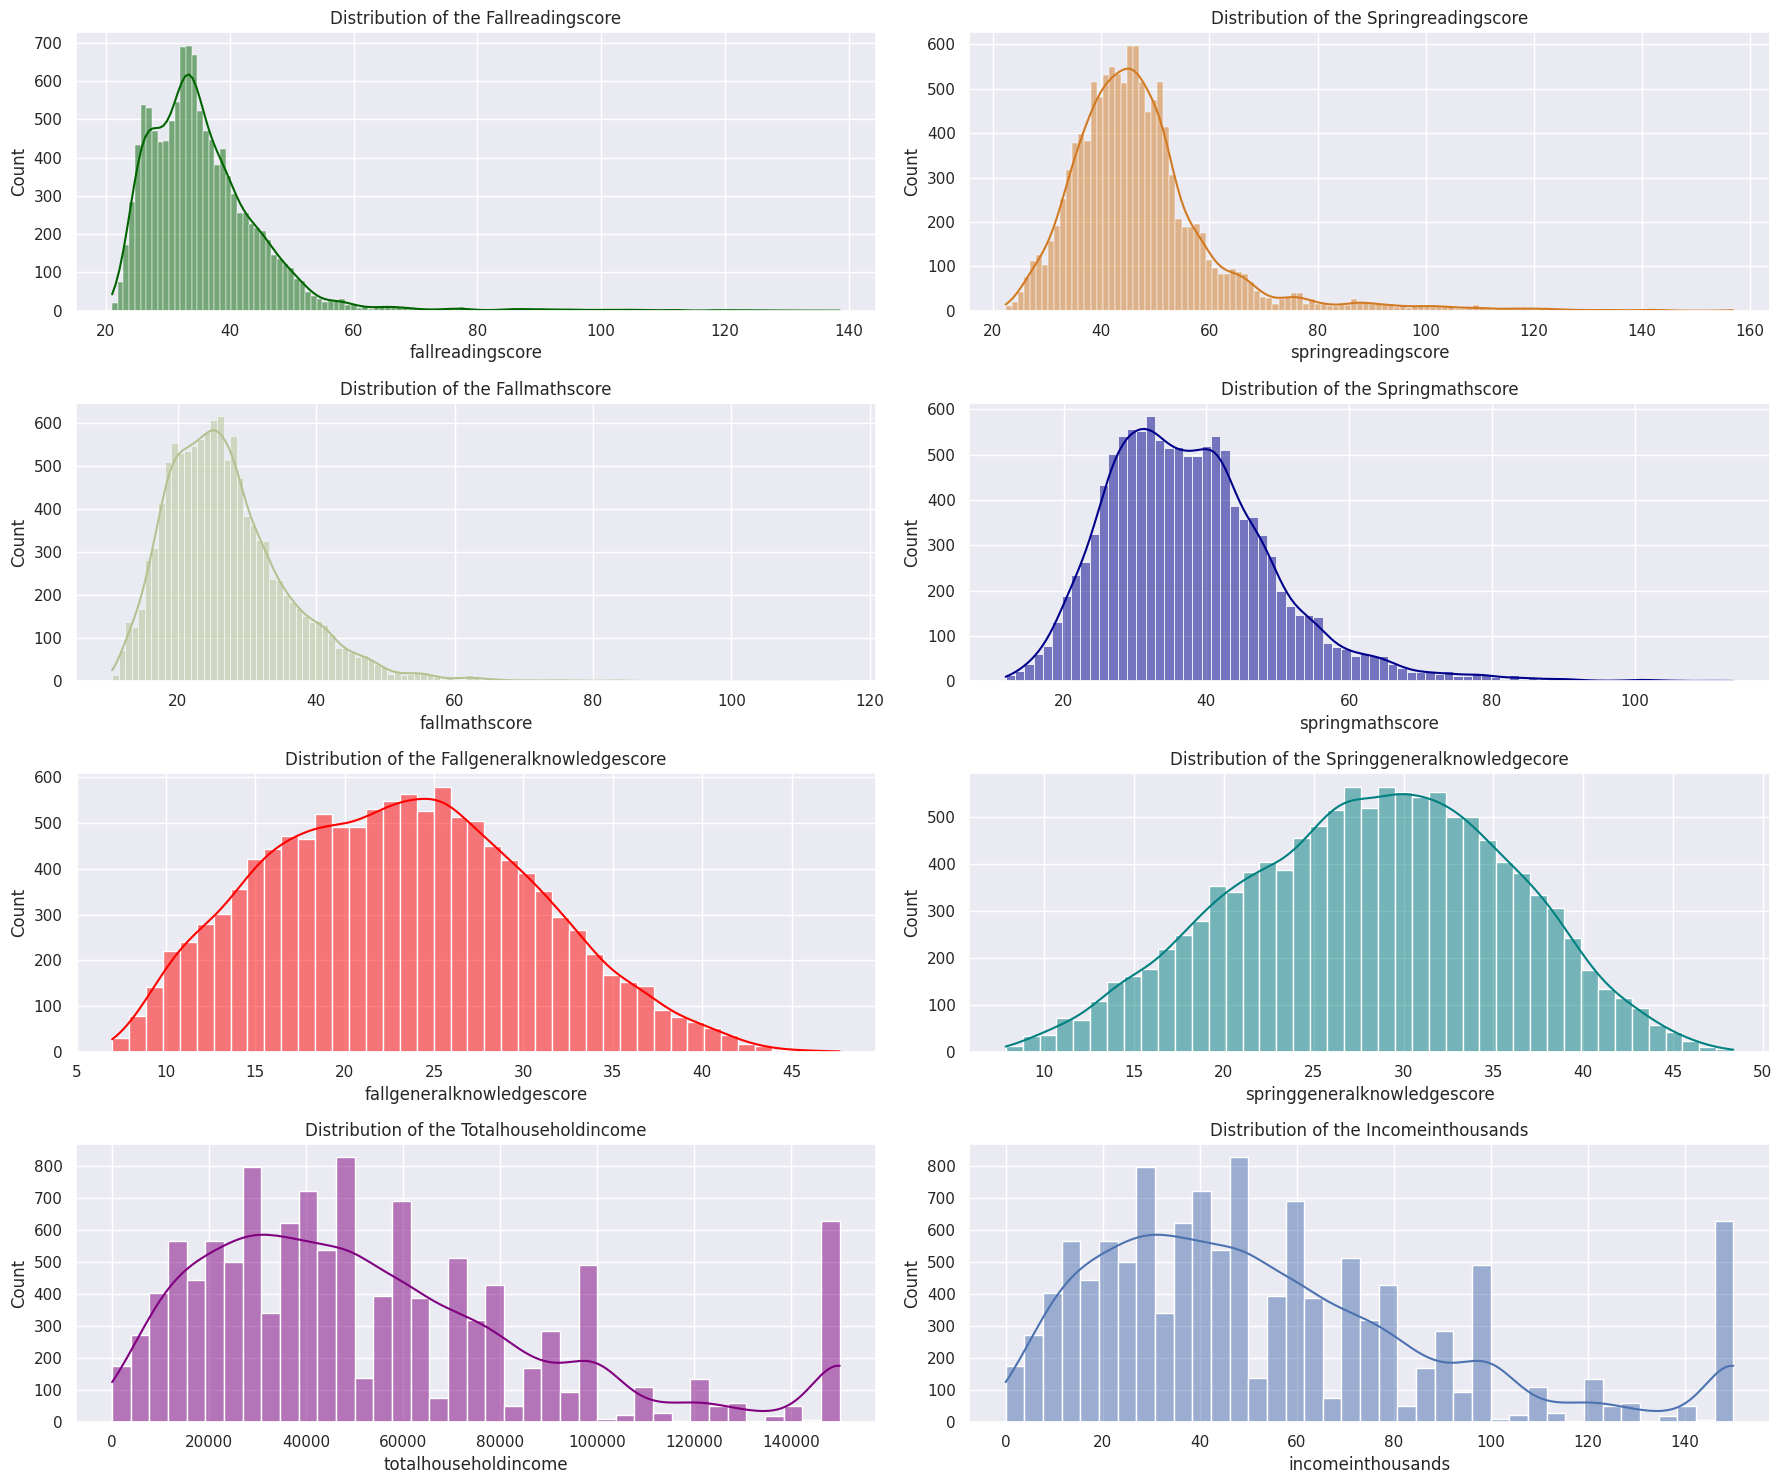

In [67]:
# set the "darkgrid" background for plots
sns.set(style="darkgrid")

# preparing the figure layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 15))

# use histograms for numerical variables
sns.histplot(mydata['fallreadingscore'], kde=True, ax=axes[0,0], color='darkgreen')
sns.histplot(mydata['springreadingscore'], kde=True, ax=axes[0,1], color='#d17a22')
sns.histplot(mydata['fallmathscore'], kde=True, ax=axes[1,0], color='#b4c292')
sns.histplot(mydata['springmathscore'], kde=True, ax=axes[1,1], color='darkblue')
sns.histplot(mydata['fallgeneralknowledgescore'], kde=True, ax=axes[2,0], color='red')
sns.histplot(mydata['springgeneralknowledgescore'], kde=True, ax=axes[2,1], color='teal')
sns.histplot(mydata['totalhouseholdincome'], kde=True, ax=axes[3,0], color='purple')
sns.histplot(mydata['incomeinthousands'], kde=True, ax=axes[3,1])

# set the titles for the histplots
axes[0,0].set_title('Distribution of the Fallreadingscore')
axes[0,1].set_title('Distribution of the Springreadingscore')
axes[1,0].set_title('Distribution of the Fallmathscore')
axes[1,1].set_title('Distribution of the Springmathscore')
axes[2,0].set_title('Distribution of the Fallgeneralknowledgescore')
axes[2,1].set_title('Distribution of the Springgeneralknowledgecore')
axes[3,0].set_title('Distribution of the Totalhouseholdincome')
axes[3,1].set_title('Distribution of the Incomeinthousands')

# adjusting layout and display the plots
plt.tight_layout()
plt.show()


### EDA based on 1 categorical field

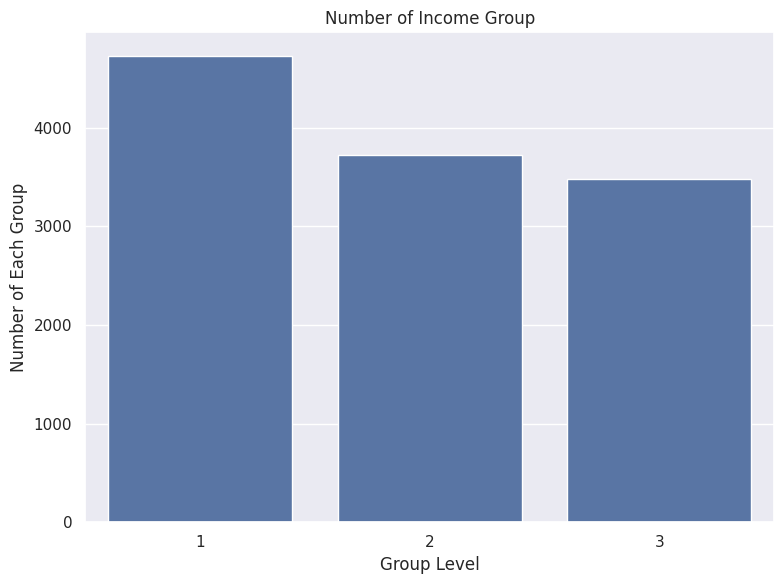

In [68]:
# preparing the figure layout & set up the size of figure
plt.figure(figsize=(8,6))
# count the values of income groups and create the barplot
income_gp = mydata['incomegroup'].value_counts()
sns.barplot(x=income_gp.index,y=income_gp.values)
# set the title and xy labels
plt.title('Number of Income Group')
plt.xlabel('Group Level')
plt.ylabel('Number of Each Group')
# adjust the layout and show the plot
plt.tight_layout()
plt.show()

# One-Way ANCOVA

#### In addition to comparing mean differences among different groups, ANCOVA also controlled for covariates of one or more continuous variables. Furthermore, the influence of confounding factors can be reduced, which can gain more accurately results.

In [69]:
# import packages here

%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

### Part 1: Examing the Fall General Knowledge Score across Income Groups, Controlling the Fall Reading Score as a covariate.

In [70]:
# summary statistics for dependent variable fallgeneralknowledgescore

mydata >> group_by(X.incomegroup) >> summarize(n=X['fallgeneralknowledgescore'].count(), mean=X['fallgeneralknowledgescore'].mean(), std=X['fallgeneralknowledgescore'].std())

,incomegroup,n,mean,std
0,1,4729,19.947683,6.717169
1,2,3726,23.887885,6.870052
2,3,3478,26.451851,7.101515


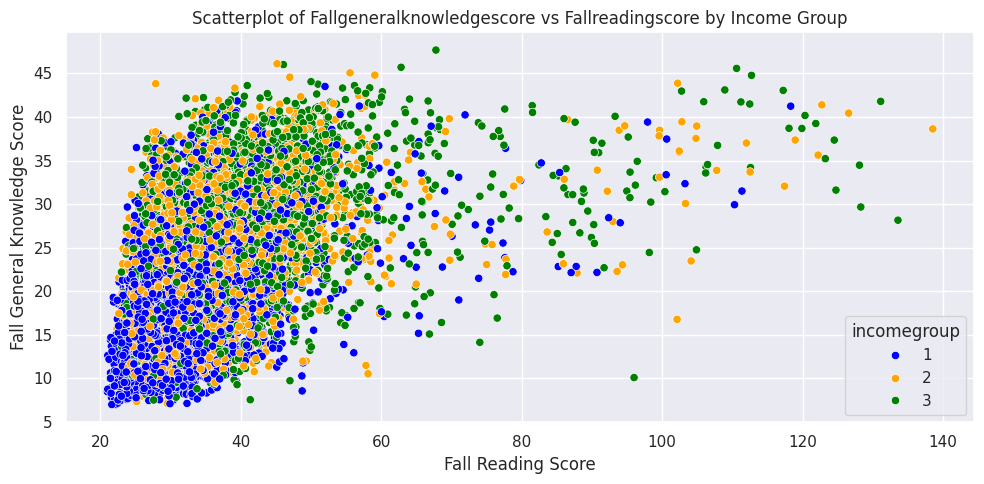

In [71]:
# Assigned the high-identified colors
high_identified_palette = ['blue','orange','green']

# Set the colors for seaborn plots
sns.set_palette(high_identified_palette)

# Scatterplot
# set-up the size of figure
plt.figure(figsize=(10,5))
sns.scatterplot(data=mydata,x="fallreadingscore",y="fallgeneralknowledgescore",hue="incomegroup",palette=high_identified_palette)
# set the title and xy labels
plt.title('Scatterplot of Fallgeneralknowledgescore vs Fallreadingscore by Income Group')
plt.xlabel('Fall Reading Score')
plt.ylabel('Fall General Knowledge Score')
# adjusting the layout to avoid overlapping and show the plot
plt.tight_layout()
plt.show()

<ipython-input-72-3549866c758a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mydata, y="incomegroup",x="fallgeneralknowledgescore",orient="h",palette=high_identified_palette)


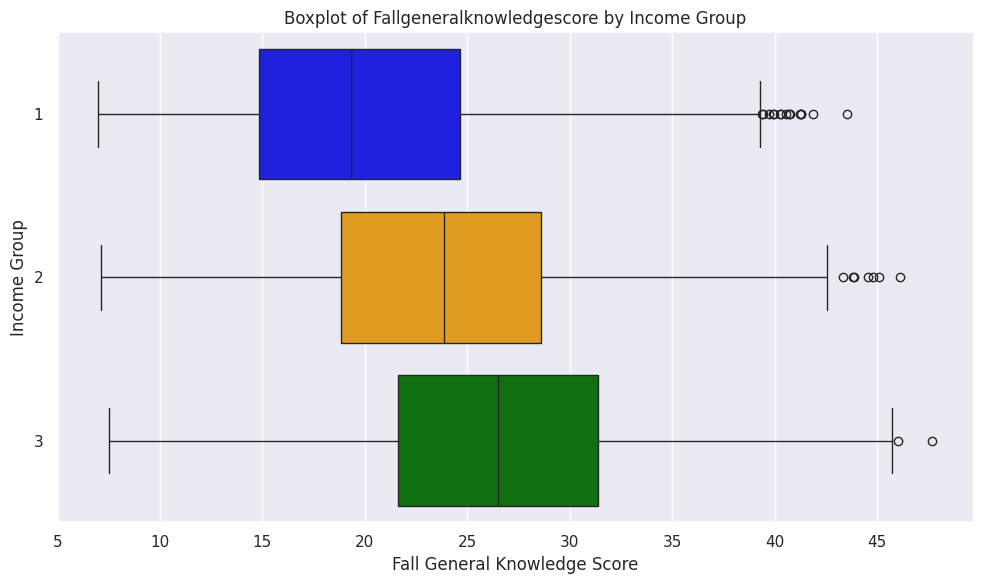

In [72]:
# Create the boxplots
# set-up the size of figure
plt.figure(figsize=(10,6))
sns.boxplot(data=mydata, y="incomegroup",x="fallgeneralknowledgescore",orient="h",palette=high_identified_palette)
# set-up the title and xy labels
plt.title('Boxplot of Fallgeneralknowledgescore by Income Group')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Income Group')
# adjusting the layout and display the plots
plt.tight_layout()
plt.show()

<ipython-input-73-e84cb7eab158>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mydata, y="incomegroup",x="fallreadingscore",orient="h",palette=high_identified_palette)


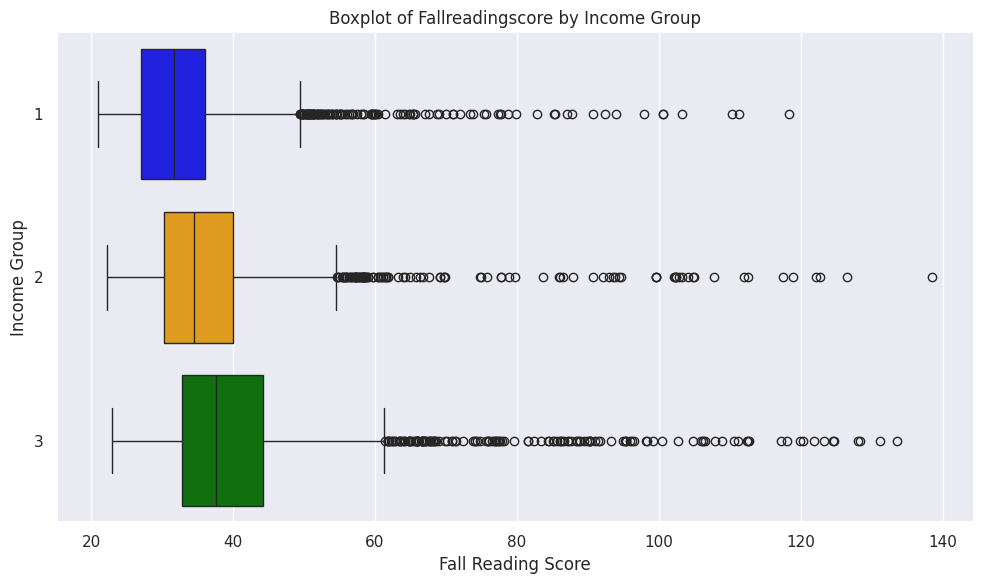

In [73]:
# Create the boxplots for showing fallreadingscore by Income Group
# set-up the size of figure
plt.figure(figsize=(10,6))
sns.boxplot(data=mydata, y="incomegroup",x="fallreadingscore",orient="h",palette=high_identified_palette)
# set-up the title and xy labels
plt.title('Boxplot of Fallreadingscore by Income Group')
plt.xlabel('Fall Reading Score')
plt.ylabel('Income Group')
# adjusting the layout and display the plots
plt.tight_layout()
plt.show()

In [74]:
# Define the data for ANCOVA (dependent variable is fallgeneralknowledgescore,covariate is fallreadingscore)
ancova(data=mydata, dv='fallgeneralknowledgescore',covar='fallreadingscore',between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,38477.156761,2,499.851851,3.428429e-209,0.077324
1,fallreadingscore,105360.481465,1,2737.449236,0.000000e+00,0.186647
2,Residual,459130.042211,11929,NaN,NaN,NaN


In [75]:
# Perform the ANCOVA and fit the ANCOVA model
model = ols('fallgeneralknowledgescore ~ incomegroup + fallreadingscore', data=mydata).fit()
# print the summary of the model
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     fallgeneralknowledgescore   R-squared:                       0.295
Model:                                   OLS   Adj. R-squared:                  0.295
Method:                        Least Squares   F-statistic:                     2494.
Date:                       Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                               17:21:36   Log-Likelihood:                -38726.
No. Observations:                      11933   AIC:                         7.746e+04
Df Residuals:                          11930   BIC:                         7.748e+04
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

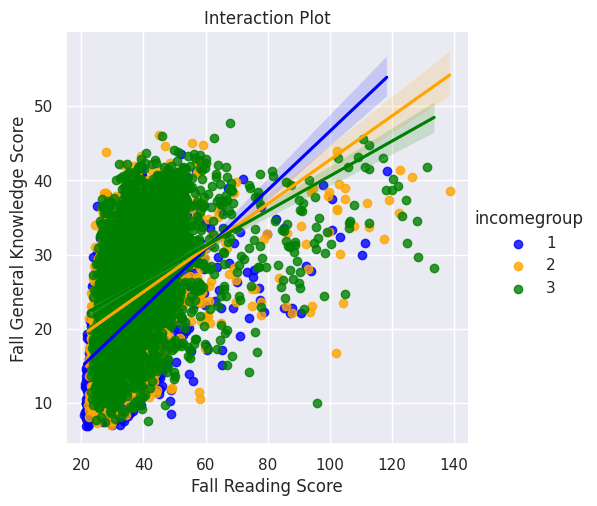

In [76]:
# Create the interaction plot for fallgeneralknowledgescore by Income Group
sns.lmplot(x='fallreadingscore',y='fallgeneralknowledgescore',hue='incomegroup',data=mydata)
# set the title and xy labels
plt.title('Interaction Plot')
plt.xlabel('Fall Reading Score')
plt.ylabel('Fall General Knowledge Score')
# show the plot
plt.show()

<Figure size 1000x500 with 0 Axes>

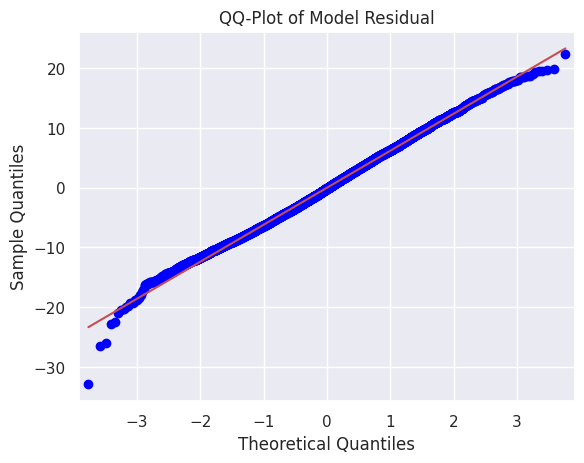

In [77]:
# Create the modelling and test assumption (Normality)
model0 = smf.ols('fallgeneralknowledgescore ~ C(incomegroup)+fallreadingscore',data=mydata).fit()
residual = model0.resid

# Using QQ-plot to test the First Assumption: Normality
# set-up the figure size
plt.figure(figsize=(10,5))
sm.qqplot(residual, line='s')
# set the title and show the plot
plt.title('QQ-Plot of Model Residual')
plt.show()

In [78]:
# Test the Second Assumption: Homogeneity of Variance
# Use the Levene's test can get the accurate result
_,p_value = stats.levene(mydata['fallgeneralknowledgescore'][mydata['incomegroup'] == 1],
             mydata['fallgeneralknowledgescore'][mydata['incomegroup'] == 2],
             mydata['fallgeneralknowledgescore'][mydata['incomegroup'] == 3])

# print the value
print("Levene's test P-value:",p_value)

# As we can see from output, P-value is approximately 0.021, which is lower than significant level (at 0.05).So, we need reject the null hypothesis that the assumption of homogeneity of variance is violated.

Levene's test P-value: 0.02095639883248799


### Part 2: Examining whether income groups can influence general knowledge scores in Spring after controlling for students' general knowledge scores at Fall.

In [79]:
# summary statistics for dependent variable springgeneralknowledgescore

mydata >> group_by(X.incomegroup) >> summarize(n=X['springgeneralknowledgescore'].count(), mean=X['springgeneralknowledgescore'].mean(), std=X['springgeneralknowledgescore'].std())

,incomegroup,n,mean,std
0,1,4729,25.069492,7.248229
1,2,3726,29.143605,6.965300
2,3,3478,31.567718,6.928347


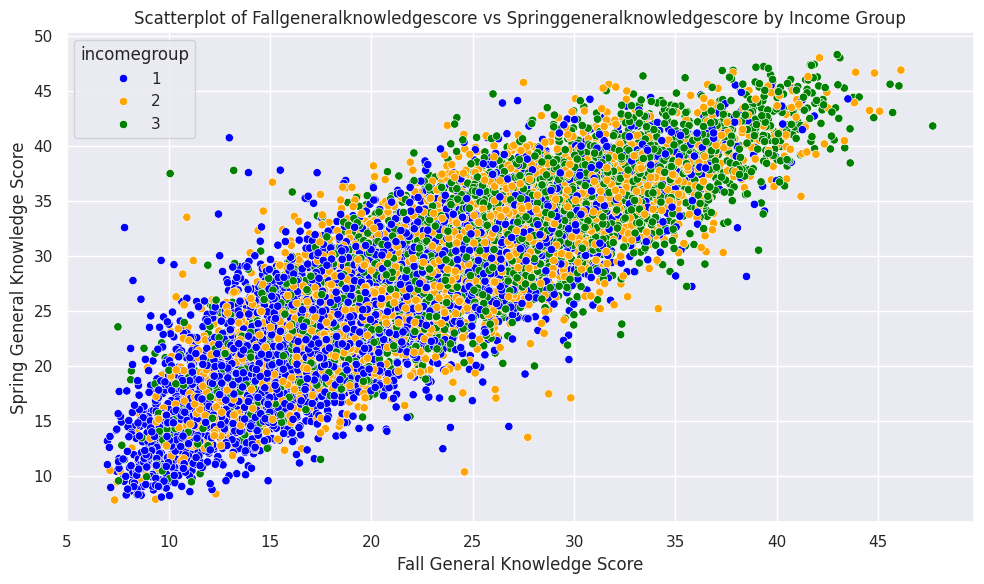

In [80]:
# Assigned the high-identified colors
high_identified_palette = ['blue','orange','green']

# Set the colors for seaborn plots
sns.set_palette(high_identified_palette)

# Scatterplot
# set-up the size of figure
plt.figure(figsize=(10,6))
sns.scatterplot(data=mydata,x="fallgeneralknowledgescore",y="springgeneralknowledgescore",hue="incomegroup",palette=high_identified_palette)
# set the title and xy labels
plt.title('Scatterplot of Fallgeneralknowledgescore vs Springgeneralknowledgescore by Income Group')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Spring General Knowledge Score')
# adjusting the layout to avoid overlapping and show the plot
plt.tight_layout()
plt.show()

<ipython-input-81-48e13ab3968e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mydata, y="incomegroup",x="fallgeneralknowledgescore",orient="h",palette=high_identified_palette)


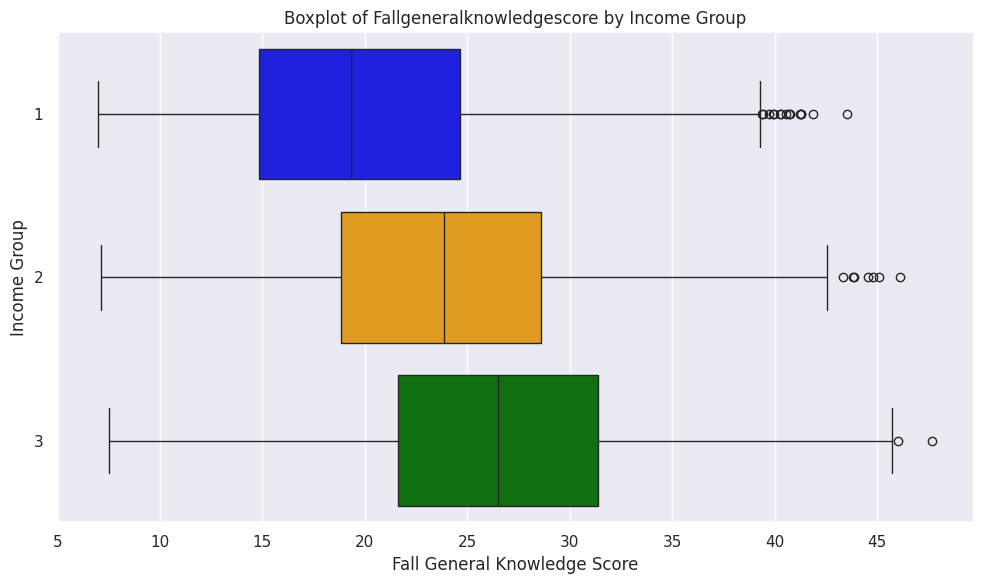

In [81]:
# Create the boxplots for fallgeneralknowledgescore by Income Group
# set-up the size of figure
plt.figure(figsize=(10,6))
sns.boxplot(data=mydata, y="incomegroup",x="fallgeneralknowledgescore",orient="h",palette=high_identified_palette)
# set-up the title and xy labels
plt.title('Boxplot of Fallgeneralknowledgescore by Income Group')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Income Group')
# adjusting the layout and display the plots
plt.tight_layout()
plt.show()

<ipython-input-82-88bd870e7de4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mydata, y="incomegroup",x="springgeneralknowledgescore",orient="h",palette=high_identified_palette)


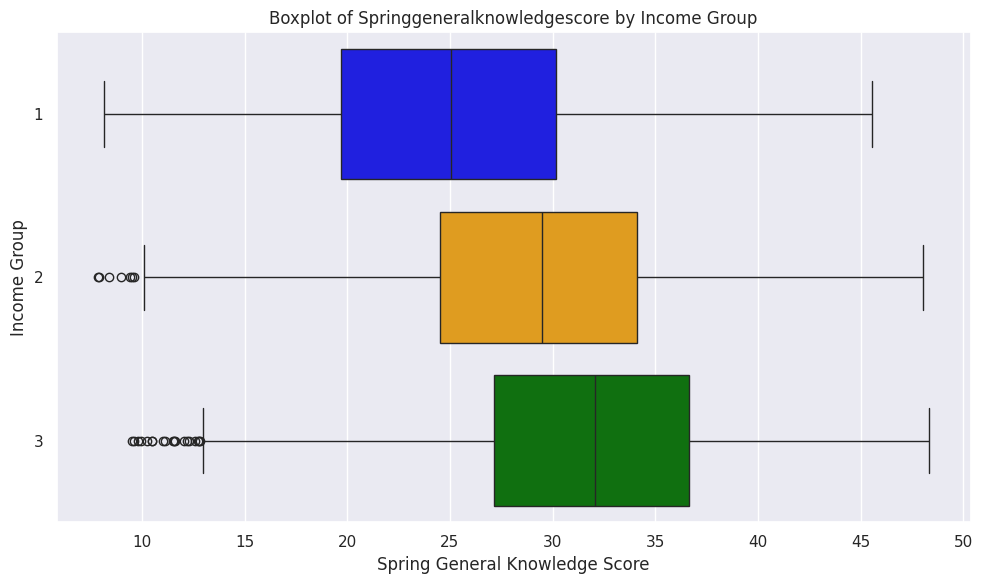

In [82]:
# Create the boxplots for springgeneralknowledgescore by Income Group
# set-up the size of figure
plt.figure(figsize=(10,6))
sns.boxplot(data=mydata, y="incomegroup",x="springgeneralknowledgescore",orient="h",palette=high_identified_palette)
# set-up the title and xy labels
plt.title('Boxplot of Springgeneralknowledgescore by Income Group')
plt.xlabel('Spring General Knowledge Score')
plt.ylabel('Income Group')
# adjusting the layout and display the plots
plt.tight_layout()
plt.show()

In [83]:
# Define the data for ANCOVA
ancova(data=mydata, dv='springgeneralknowledgescore',covar='fallgeneralknowledgescore',between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1756.904469,2,56.908040,2.525291e-25,0.009451
1,fallgeneralknowledgescore,411876.768316,1,26682.269841,0.000000e+00,0.691049
2,Residual,184140.179925,11929,NaN,NaN,NaN


In [85]:
# Perform the ANCOVA and fit the ANCOVA model
modell = ols('springgeneralknowledgescore ~ incomegroup + fallgeneralknowledgescore', data=mydata).fit()
# print the summary of the model
print(modell.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.621e+04
Date:                         Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                                 17:22:15   Log-Likelihood:                -33263.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11930   BIC:                         6.656e+04
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [87]:
# Adding interaction term and fit the model
interaction_mod = smf.ols('springgeneralknowledgescore ~ incomegroup * fallgeneralknowledgescore',data=mydata).fit()
# print the summary of results
print(interaction_mod.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.732
Model:                                     OLS   Adj. R-squared:                  0.732
Method:                          Least Squares   F-statistic:                 1.087e+04
Date:                         Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                                 17:22:29   Log-Likelihood:                -33238.
No. Observations:                        11933   AIC:                         6.648e+04
Df Residuals:                            11929   BIC:                         6.651e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [88]:
# Conduct post-hoc analysis after ANCOVA - if incomegroup as a categorical variable with more than two levels
from statsmodels.stats.multicomp import MultiComparison

multicomp = MultiComparison(mydata['springgeneralknowledgescore'], mydata['incomegroup'])
tukey_res = multicomp.tukeyhsd()
# print the summary of result
print(tukey_res.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   4.0741   0.0 3.7112  4.437   True
     1      3   6.4982   0.0 6.1281 6.8683   True
     2      3   2.4241   0.0 2.0335 2.8147   True
-------------------------------------------------


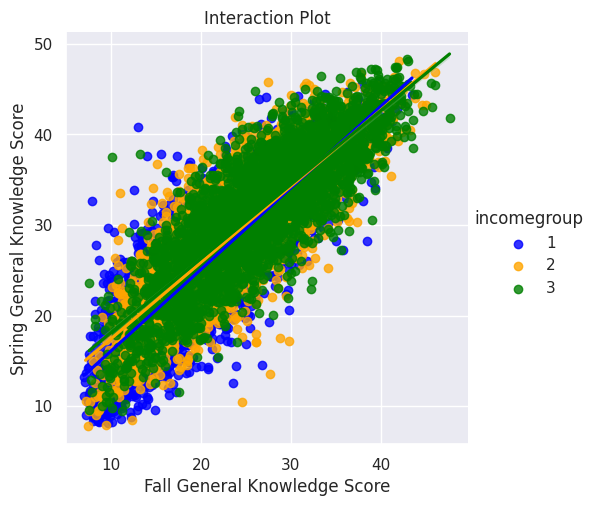

In [89]:
# create the interaction plot for general knowledge scores in Spring and Fall terms by Income Group
sns.lmplot(x='fallgeneralknowledgescore',y='springgeneralknowledgescore',hue='incomegroup',data=mydata)
# set the xy labels and title
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Spring General Knowledge Score')
plt.title('Interaction Plot')
# show the plot
plt.show()

<Figure size 1000x500 with 0 Axes>

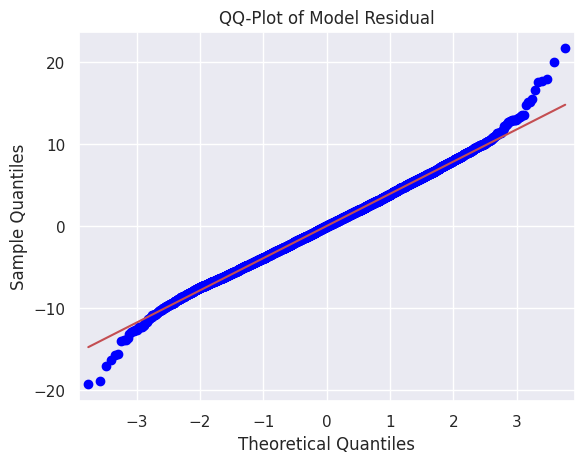

In [90]:
# Create the modelling and test assumptions (Normality, Homogeneity of Variance)
model1 = smf.ols('springgeneralknowledgescore ~ C(incomegroup)+fallgeneralknowledgescore',data=mydata).fit()
residual = model1.resid

# Using QQ-plot to test the First Assumption: Normality
# set-up the figure size
plt.figure(figsize=(10,5))
sm.qqplot(residual, line='s')
# set the title and show the plot
plt.title('QQ-Plot of Model Residual')
plt.show()

In [91]:
# Used Bartlett's test to test Homogeneity of Variance
_, p_value = stats.bartlett(
    mydata['springgeneralknowledgescore'][mydata['incomegroup'] == 1],
    mydata['springgeneralknowledgescore'][mydata['incomegroup'] == 2],
    mydata['springgeneralknowledgescore'][mydata['incomegroup'] == 3]
)

# Print the value of P-value
print("Bartlett's test p-value:", p_value)

Bartlett's test p-value: 0.005490325533018799


In [92]:
# Test the Second Assumption: Homogeneity of Variance
# Due to the QQ-plot have a minor data points not lies with the line, so we better use the Levene test to get more accurate result
_,p_value = stats.levene(mydata['springgeneralknowledgescore'][mydata['incomegroup'] == 1],
             mydata['springgeneralknowledgescore'][mydata['incomegroup'] == 2],
             mydata['springgeneralknowledgescore'][mydata['incomegroup'] == 3])

# print the value
print("Levene's test P-value:",p_value)

Levene's test P-value: 8.286000485876772e-05
